<a href="https://colab.research.google.com/github/salimunlu47/HamdyTaha-Operations-Research-Textbook-/blob/main/Chapter2_Modeling_with_Linear_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Two-Variable LP Model

##Example 2.1-1 (The Reddy Mikks Company)
Reddy Mikks produces both interior and exterior paints from two raw materials, M1 and M2.

The following table provides the basic data of the problem:

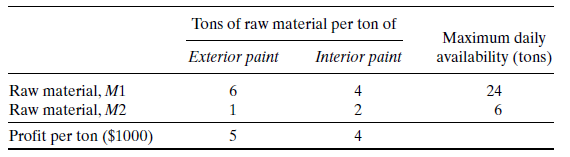

For the Reddy Mikks problem, we need to determine the daily amounts of exterior and interior paints to be produced. 

Thus the variables of the model are defined as:

x<sub>1</sub> = Tons produced daily of exterior paint

x<sub>2</sub> = Tons produced daily of interior paint

The goal of Reddy Mikks is to maximize (i.e., increase as much as possible) the total daily
profit of both paints.

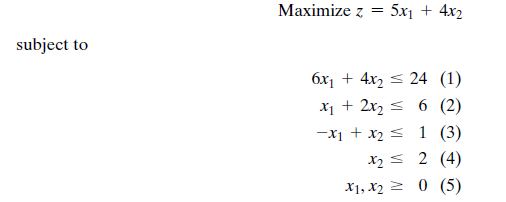

To define and solve optimization problems with SciPy, you need to import scipy.optimize.linprog():

In [1]:
from scipy.optimize import linprog

The next step is to define the input values:

Instead of maximizing z = x + 2y, you can minimize its negative(−z = −x − 2y).

In [2]:
obj = [-5, -4]
#      ─┬  ─┬
#       │   └┤ Coefficient for x2
#       └────┤ Coefficient for x1

In [3]:
lhs_ineq = [[ 6,  4],  # 1st constraint left side
            [ 1,  2],  # 2nd constraint left side
            [-1,  1],  # 3rd constraint left side
            [ 0,  1]]  # 4th constraint left side

In [4]:
rhs_ineq = [24,  # 1st constraint right side
            6,   # 2nd constraint right side
            1,   # 3rd constraint right side
            2]   # 4th constraint right side

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [5]:
bnd = [(0, float("inf")),  # Bounds of x1
       (0, float("inf"))]  # Bounds of x2

Finally, it’s time to optimize and solve your problem of interest. You can do that with `linprog()`:

In [6]:
opt = linprog(c=obj, 
              A_ub=lhs_ineq, 
              b_ub=rhs_ineq,
              bounds=bnd,
              method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -21.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 2.5, 0.5])
  status: 0
 success: True
       x: array([3. , 1.5])

The solution is x<sub>1</sub> = 3 and x<sub>2</sub> = 1.5 with z = 5 * 3 + 4 * 1.5 = 21. This calls for a daily product mix of 3 tons of exterior paint and 1.5 tons of interior paint. The associated daily profit is $21,000.